In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:

file_path = "https://raw.githubusercontent.com/juankquintana/aprendizaje-no-supervisado/main/Proyecto/data/movies_metadata.csv"

metadata = pd.read_csv(file_path)

metadata.head(5)

<ipython-input-2-ec0f761ae13f>:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv(file_path)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
print("Columnas en el DataFrame:")
print(metadata.info())

Columnas en el DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379

In [ ]:
# Calcular el porcentaje de datos vacíos para cada columna
missing_data = metadata.isnull().sum()  # Contar valores nulos por columna
total_data = len(metadata)  # Número total de filas en el DataFrame
missing_percentage = (missing_data / total_data) * 100  # Calcular porcentaje

# Crear un DataFrame para mostrar la información
missing_data_summary = pd.DataFrame({
    'Total Missing': missing_data,
    'Percentage Missing': missing_percentage
})

# Ordenar por porcentaje de datos vacíos en orden descendente
missing_data_summary = missing_data_summary.sort_values(by='Percentage Missing', ascending=False)

# Mostrar el resumen de datos vacíos
print(missing_data_summary)

                       Total Missing  Percentage Missing
belongs_to_collection          40972           90.115691
homepage                       37684           82.883913
tagline                        25054           55.104914
overview                         954            2.098271
poster_path                      386            0.848986
runtime                          263            0.578454
status                            87            0.191352
release_date                      87            0.191352
imdb_id                           17            0.037391
original_language                 11            0.024194
spoken_languages                   6            0.013197
title                              6            0.013197
video                              6            0.013197
vote_average                       6            0.013197
revenue                            6            0.013197
vote_count                         6            0.013197
popularity                     

In [ ]:
# Convertir Budget y popularity a datos numericos

metadata['popularity'] = pd.to_numeric(metadata['popularity'], errors='coerce')

# Limpiar y convertir la columna 'budget' a tipo float
metadata['budget'] = pd.to_numeric(metadata['budget'], errors='coerce')

# Diccionario de descripciones detalladas de columnas
- 'id': 'Identificador único para cada película en el dataset. Puede no ser único a nivel global.',
- 'imdb_id': 'Identificador único de la película en IMDb. Formato: "ttXXXXXXX", donde X son dígitos.',
- 'original_title': 'Título original de la película tal como se presenta en su país de origen.',
- 'overview': 'Descripción o sinopsis de la película. Proporciona un resumen breve de la trama.',
- 'popularity': 'Puntuación que refleja la popularidad de la película. Generalmente calculada con base en factores como las búsquedas y visualizaciones.',
- 'release_date': 'Fecha en la que la película fue estrenada en cines. Formato: "YYYY-MM-DD".',
- 'revenue': 'Monto total de ingresos generados por la película en dólares. Puede incluir taquilla y otros ingresos.',
- 'runtime': 'Duración de la película en minutos. Representa el tiempo total que dura la película.',
- 'status': 'Estado actual de la película. Ejemplos incluyen "Released" (estrenada), "Post Production" (en postproducción), etc.',
- 'tagline': 'Slogan o lema de la película, utilizado como herramienta de marketing. Generalmente una frase corta y atractiva.',
- 'title': 'Título de la película en el idioma principal del dataset o el título que se usa comúnmente.',
- 'vote_average': 'Promedio de las calificaciones recibidas de los usuarios. Un valor numérico que refleja la recepción general de la película.',
- 'vote_count': 'Número total de votos que la película ha recibido. Utilizado para calcular el promedio de votos.',
- 'budget': 'Monto total del presupuesto de producción de la película en dólares.',
- 'genres': 'Lista de géneros a los que pertenece la película. Generalmente en formato JSON, donde cada género tiene un ID y un nombre.',
- 'production_companies': 'Lista de compañías productoras involucradas en la realización de la película. En formato JSON, donde cada entrada incluye información como el nombre de la compañía y su ID.',
- 'production_countries': 'Lista de países en los que se produjo la película. En formato JSON, incluyendo el nombre del país y su código.',
- 'spoken_languages': 'Idiomas hablados en la película. En formato JSON, donde cada idioma tiene un nombre y un código.',
- 'adult': 'Indica si la película es para adultos. Generalmente un valor booleano.',
- 'belongs_to_collection': 'Información sobre la colección a la que pertenece la película, en formato JSON si aplica. Incluye ID y nombre de la colección.',
- 'homepage': 'URL de la página web oficial de la película.',
- 'original_language': 'Código del idioma original en el que se hizo la película, utilizando el estándar ISO 639-1.',
- 'poster_path': 'Ruta o URL del cartel (poster) de la película. Generalmente una cadena que representa la ruta al archivo de imagen.'

In [ ]:
metadata.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,4.546300e+04,45460.000000,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,4.224579e+06,2.921478,1.120935e+07,94.128199,5.618207,109.897338
std,1.742413e+07,6.005414,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,0.385948,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,1.127685,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,3.678902,0.000000e+00,107.000000,6.800000,34.000000
max,3.800000e+08,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000


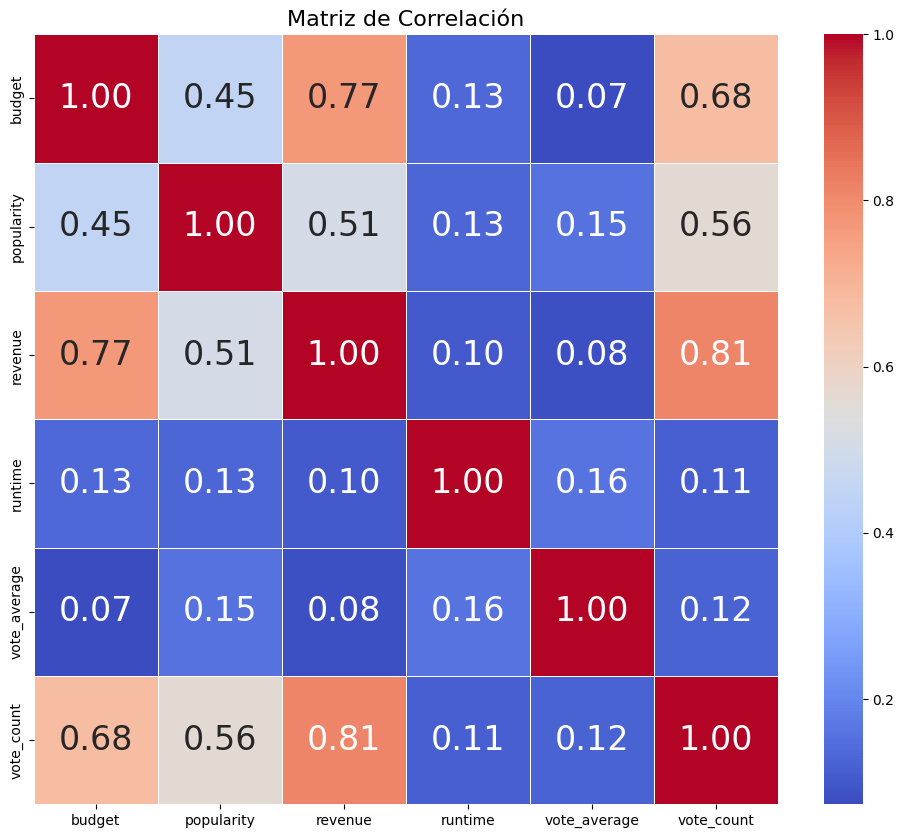

In [ ]:
numeric_cols = metadata.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_cols.corr()

# Crear el gráfico de calor de la matriz de correlación
plt.figure(figsize=(12, 10))  # Ajustar el tamaño de la figura según sea necesario
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,annot_kws={"size": 24})

# Títulos y etiquetas
plt.title('Matriz de Correlación', fontsize=16)
plt.show()

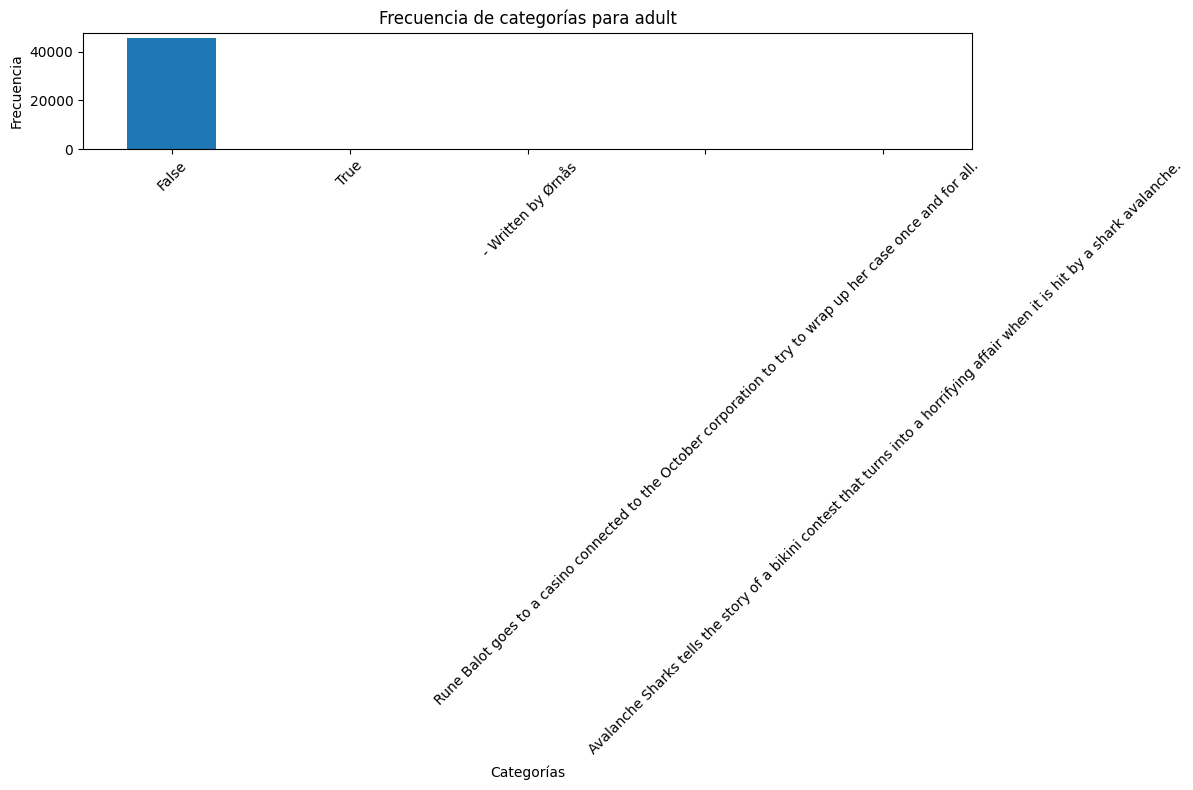

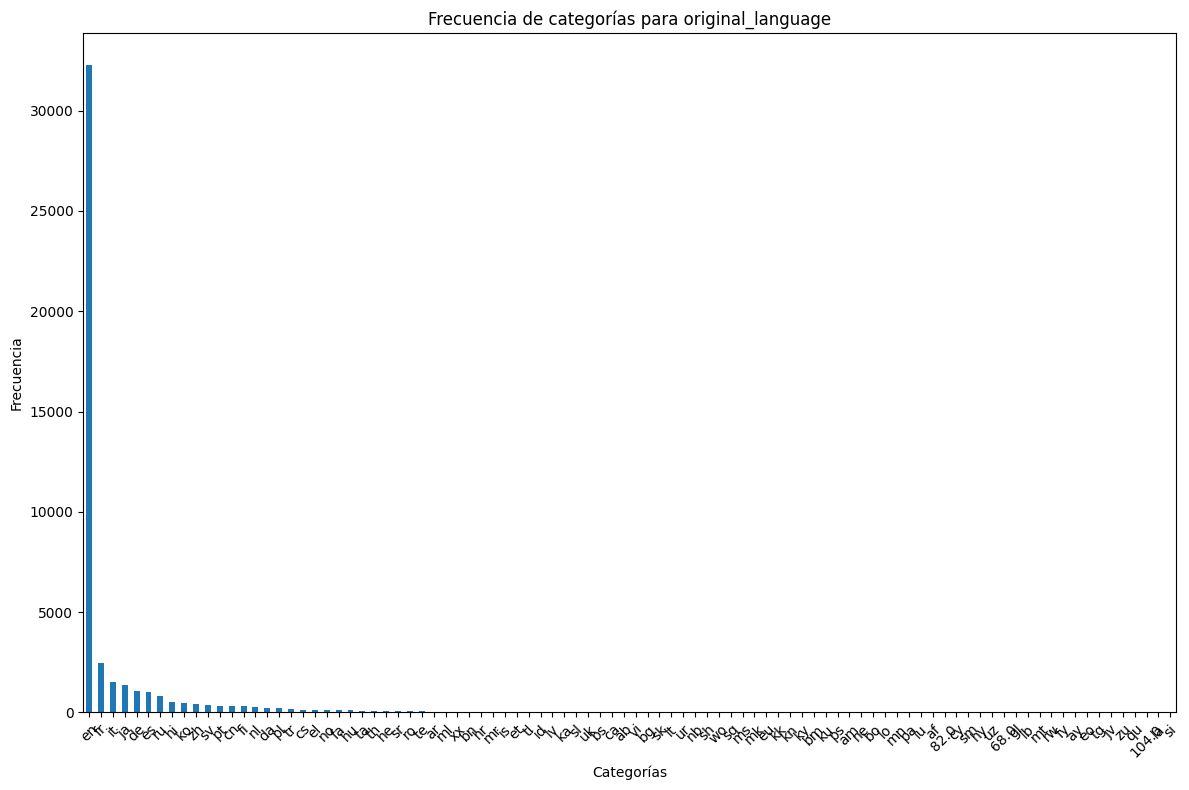

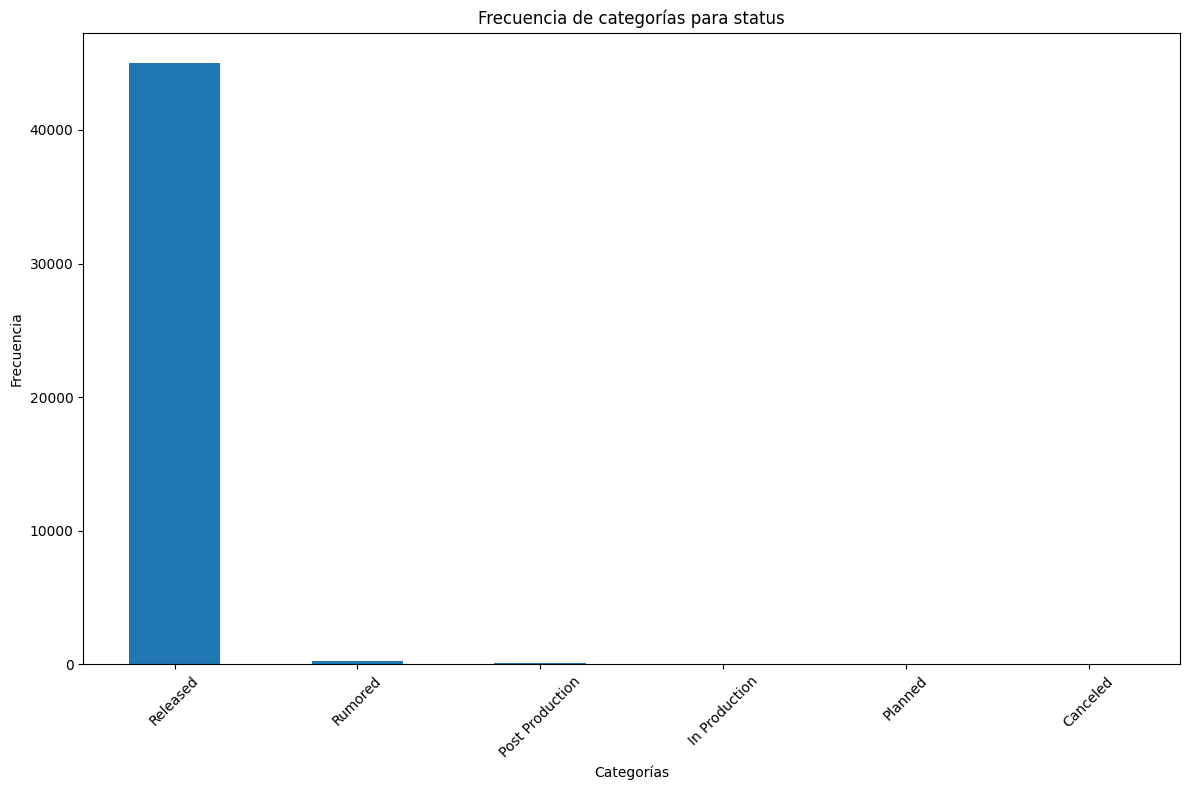

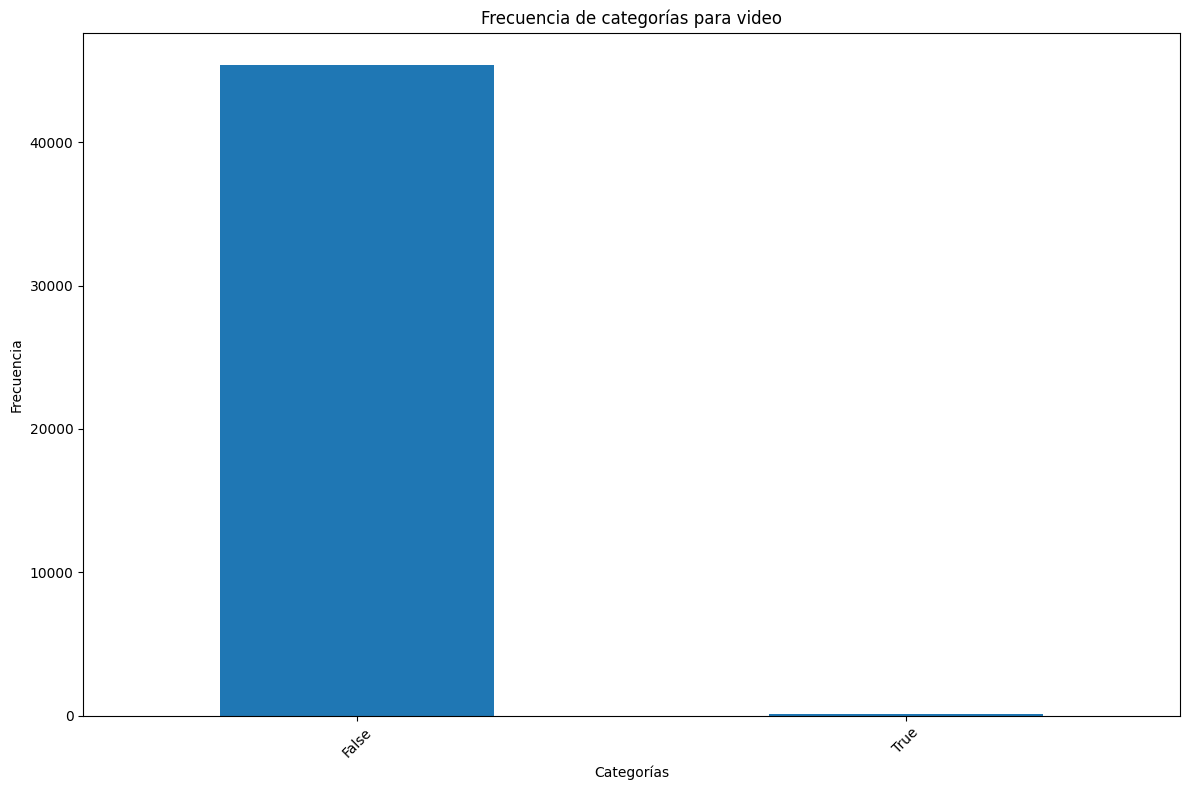

In [ ]:
object_columns = ('adult','original_language','status','video')
# Crear gráficos de barras para cada columna de tipo 'object'
for column in object_columns:
    # Contar la frecuencia de cada categoría
    value_counts = metadata[column].value_counts()

    # Crear un gráfico de barras
    plt.figure(figsize=(12, 8))
    value_counts.plot(kind='bar')
    plt.title(f'Frecuencia de categorías para {column}')
    plt.xlabel('Categorías')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Comentario
Ya que en estas variables casi todos los datos estan en una categoria, se podria considerar eliminarlas

In [ ]:
# Conversion de las columnas, genero, production companie y production country

import ast

def columnas_transformadas(metadata, columna, indicador, nuevo_nombre):
    # Crear una nueva columna temporal con los datos convertidos
    metadata['col_p'] = metadata[columna].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    # Extraer el valor deseado
    metadata[nuevo_nombre] = metadata['col_p'].apply(lambda x: [genre_p[indicador] for genre_p in x] if isinstance(x, list) else [])
    # Eliminar la columna temporal
    metadata = metadata.drop(columns=['col_p'])
    # Mostrar las primeras filas del nuevo nombre de columna
    print(metadata[nuevo_nombre].head(5))
    return metadata


metadata = columnas_transformadas(metadata, 'genres', 'name', 'genre_names')
metadata = columnas_transformadas(metadata, 'production_companies', 'name', 'production_company_names')
metadata = columnas_transformadas(metadata, 'production_countries', 'iso_3166_1', 'production_country_names')
metadata = columnas_transformadas(metadata, 'spoken_languages', 'iso_639_1', 'spoken_language_names')

0     [Animation, Comedy, Family]
1    [Adventure, Fantasy, Family]
2               [Romance, Comedy]
3        [Comedy, Drama, Romance]
4                        [Comedy]
Name: genre_names, dtype: object
0                            [Pixar Animation Studios]
1    [TriStar Pictures, Teitler Film, Interscope Co...
2                       [Warner Bros., Lancaster Gate]
3             [Twentieth Century Fox Film Corporation]
4         [Sandollar Productions, Touchstone Pictures]
Name: production_company_names, dtype: object
0    [US]
1    [US]
2    [US]
3    [US]
4    [US]
Name: production_country_names, dtype: object
0        [en]
1    [en, fr]
2        [en]
3        [en]
4        [en]
Name: spoken_language_names, dtype: object


<ipython-input-10-48b1206846ef>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='movie_count', y=columna, data=top_25_genres, palette='viridis')


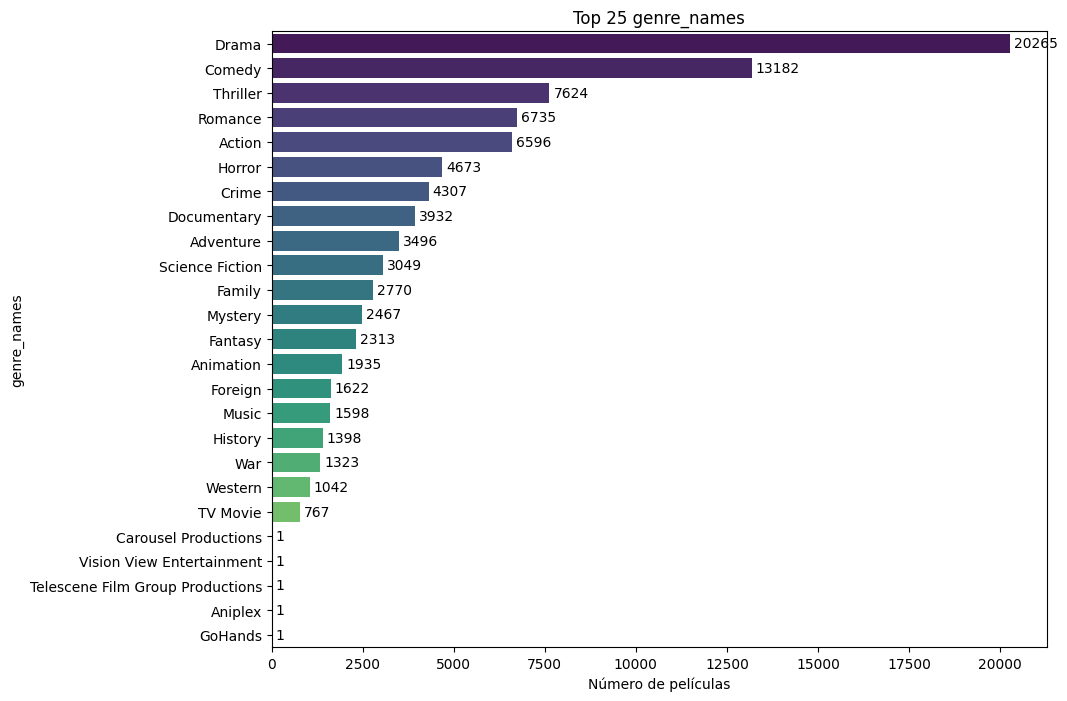

<ipython-input-10-48b1206846ef>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='movie_count', y=columna, data=top_25_genres, palette='viridis')


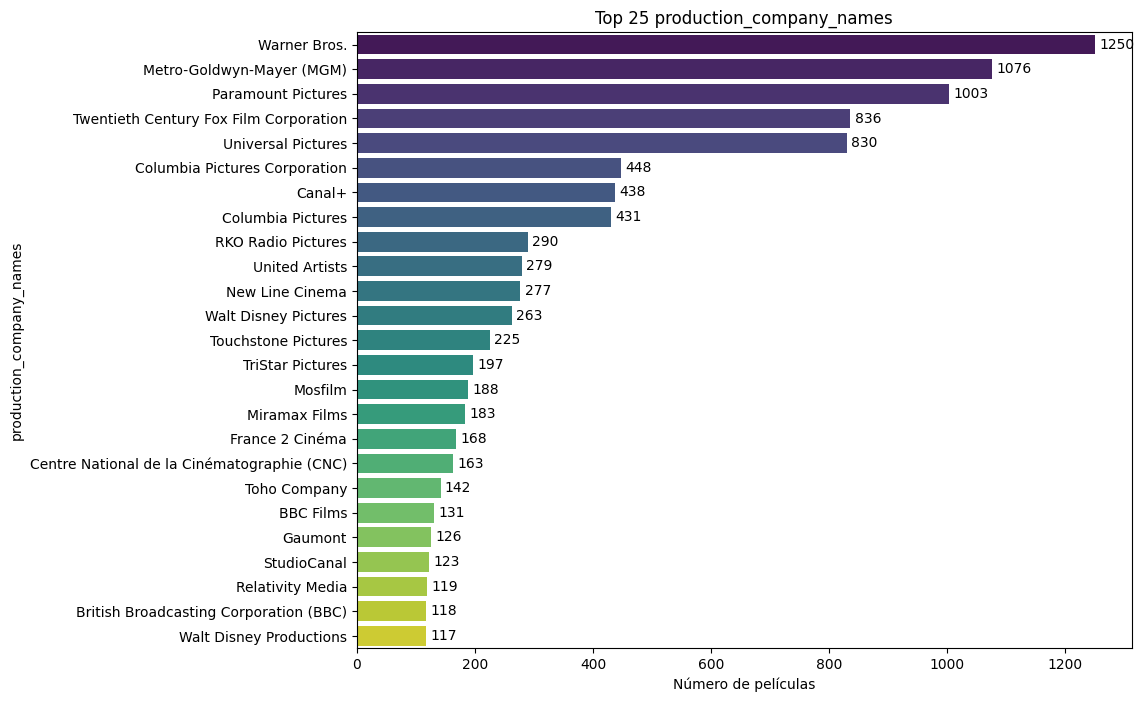

<ipython-input-10-48b1206846ef>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='movie_count', y=columna, data=top_25_genres, palette='viridis')


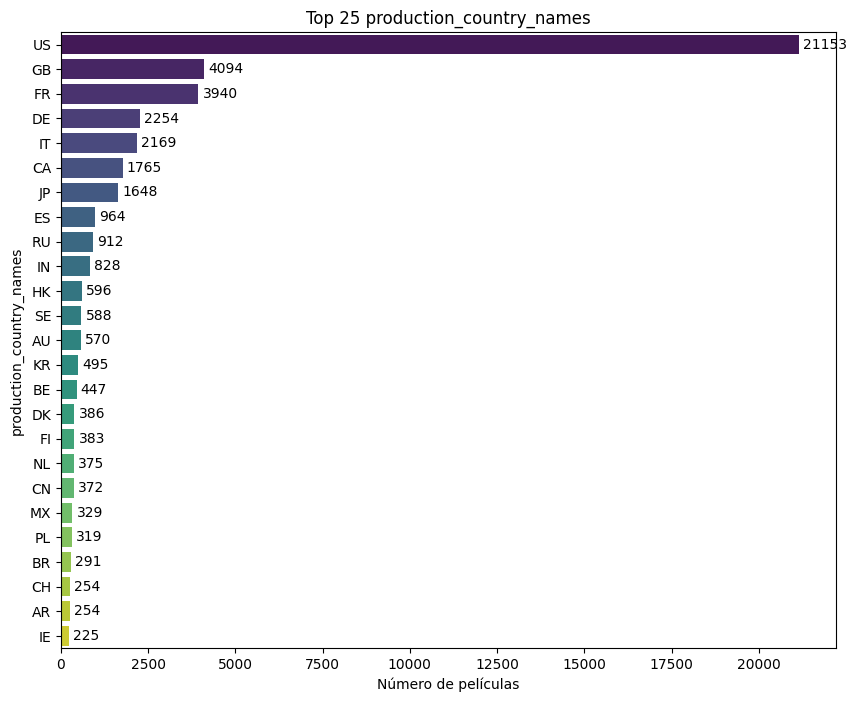

<ipython-input-10-48b1206846ef>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='movie_count', y=columna, data=top_25_genres, palette='viridis')


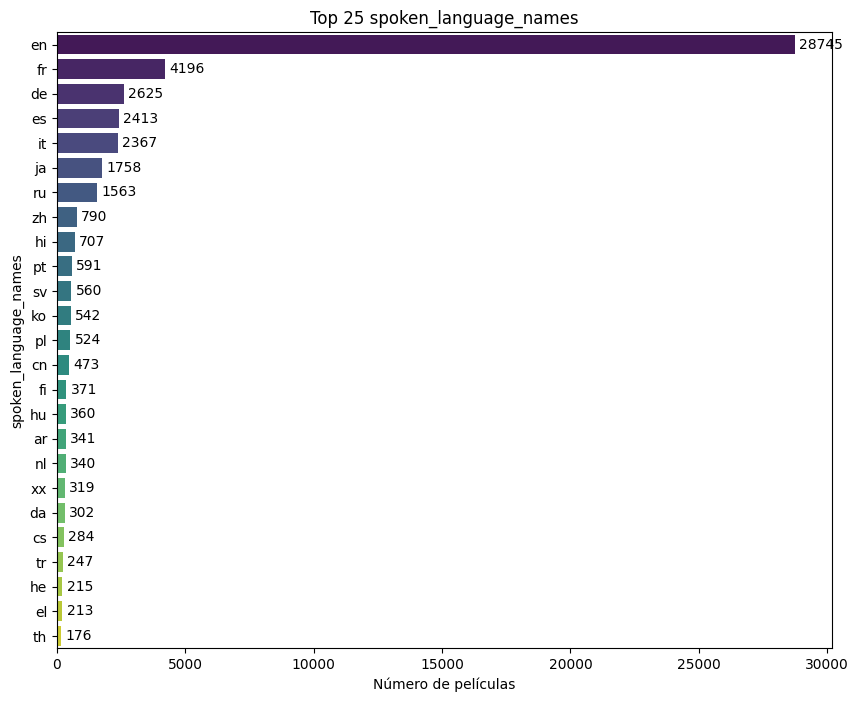

In [ ]:
for columna in ('genre_names','production_company_names','production_country_names','spoken_language_names'):
    metadata_exploded = metadata.explode(columna)

    # Luego, contar cuántas veces aparece cada género
    genre_counts = metadata_exploded[columna].value_counts().reset_index()
    genre_counts.columns = [columna, 'movie_count']

    # Seleccionar solo el top 25 géneros
    top_25_genres = genre_counts.head(25)

    # Graficar los datos
    plt.figure(figsize=(10, 8))
    ax = sns.barplot(x='movie_count', y=columna, data=top_25_genres, palette='viridis')

    # Agregar etiquetas de datos
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

    plt.xlabel('Número de películas')
    plt.ylabel(columna)
    plt.title('Top 25 {}'.format(columna))
    plt.show()

In [ ]:
file_path_keywords = "https://raw.githubusercontent.com/juankquintana/aprendizaje-no-supervisado/main/Proyecto/data/keywords.csv"

df_keywords = pd.read_csv(file_path_keywords)

df_keywords.head(5)


,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [ ]:
import ast

# Convertir la columna 'keywords' de string a una lista de diccionarios
df_keywords['keywords'] = df_keywords['keywords'].apply(ast.literal_eval)
df_keywords_exploded = df_keywords.explode('keywords')

df_keywords_exploded['keyword_id'] = df_keywords_exploded['keywords'].apply(lambda x: x['id'] if isinstance(x, dict) else None)
df_keywords_exploded['keyword_name'] = df_keywords_exploded['keywords'].apply(lambda x: x['name'] if isinstance(x, dict) else None)

# Eliminar la columna original 'keywords'
df_keywords_exploded = df_keywords_exploded.drop(columns=['keywords'])

print(df_keywords_exploded.head(20))

      id  keyword_id              keyword_name
0    862       931.0                  jealousy
0    862      4290.0                       toy
0    862      5202.0                       boy
0    862      6054.0                friendship
0    862      9713.0                   friends
0    862      9823.0                   rivalry
0    862    165503.0             boy next door
0    862    170722.0                   new toy
0    862    187065.0         toy comes to life
1   8844     10090.0                board game
1   8844     10941.0             disappearance
1   8844     15101.0  based on children's book
1   8844     33467.0                  new home
1   8844    158086.0                   recluse
1   8844    158091.0              giant insect
2  15602      1495.0                   fishing
2  15602     12392.0               best friend
2  15602    179431.0      duringcreditsstinger
2  15602    208510.0                   old men
3  31357       818.0            based on novel


<ipython-input-13-e6ee17b3069c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='movie_count', y='keyword_name', data=top_25_keywords, palette='viridis')


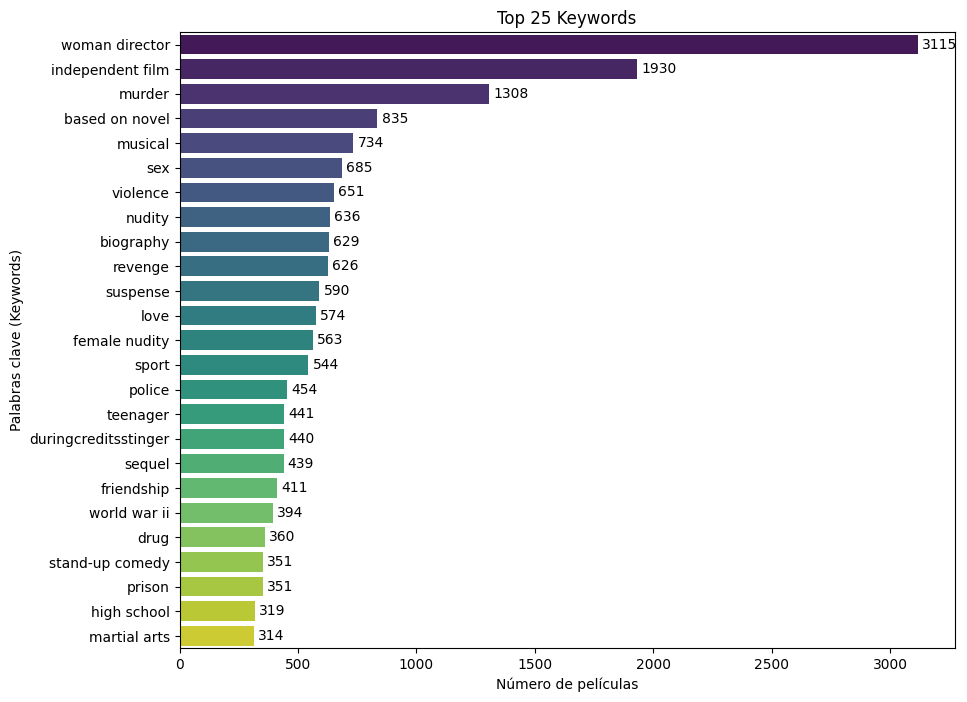

In [ ]:
keyword_counts = df_keywords_exploded.groupby('keyword_name')['id'].count().reset_index(name='movie_count')

# Ordenar los datos por el número de películas para una mejor visualización
keyword_counts = keyword_counts.sort_values('movie_count', ascending=False)

top_25_keywords = keyword_counts.head(25)

# Graficar los datos
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='movie_count', y='keyword_name', data=top_25_keywords, palette='viridis')

# Agregar etiquetas de datos
for i in ax.containers:
    ax.bar_label(i, fmt='%d', label_type='edge', padding=3)

plt.xlabel('Número de películas')
plt.ylabel('Palabras clave (Keywords)')
plt.title('Top 25 Keywords')
plt.show()

In [ ]:
file_path_ratings = "https://raw.githubusercontent.com/juankquintana/aprendizaje-no-supervisado/main/Proyecto/data/ratings_small.csv"

df_ratings = pd.read_csv(file_path_ratings)

df_ratings.head(5)


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
unique_values_id_ppl = df_ratings['userId'].unique()
len(unique_values_id_ppl)

671

<ipython-input-23-aa48585edf73>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='rating', y='movie_count', data=movie_counts, palette='viridis')


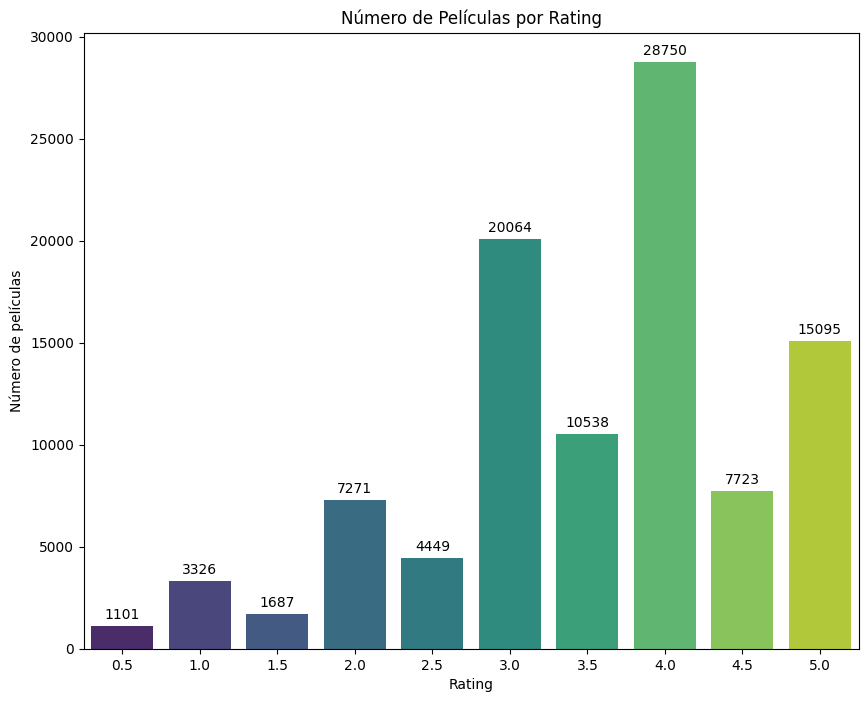

In [ ]:
movie_counts = df_ratings.groupby('rating')['movieId'].count().reset_index(name='movie_count')

# Ordenar los datos por rating para una mejor visualización
movie_counts = movie_counts.sort_values('rating', ascending=True)

# Graficar los datos
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='rating', y='movie_count', data=movie_counts, palette='viridis')

# Agregar etiquetas de datos
for i in ax.containers:
    ax.bar_label(i, fmt='%d', label_type='edge', padding=3)

plt.xlabel('Rating')
plt.ylabel('Número de películas')
plt.title('Número de Películas por Rating')
plt.show()